**AD 654 Final Project Fall 2024**

**Team: Version 5.0**

# **Forecasting Earnings Per Share DIS**

**Aim**

*To forecast Disney's Earnings Per Share (EPS) for Fiscal Year 2025 using historical data and Python-based forecasting tools, capturing recent trends and providing actionable insights for stakeholders.*

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import statsmodels.formula.api as smf
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# File path
eps_df = pd.read_csv('/content/EPS DIS.csv', index_col= 'YEAR', parse_dates=True)

In [ ]:
eps_df.head()

,EPS
YEAR,
2024-09-30,2.72
2023-09-30,1.29
2022-09-30,1.72
2021-09-30,1.09
2020-09-30,-1.58


In [ ]:
eps_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2024-09-30 to 2009-08-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EPS     16 non-null     float64
dtypes: float64(1)
memory usage: 256.0 bytes


In [ ]:
# Check the dataset
print(eps_df.describe())

             EPS
count  16.000000
mean    3.352500
std     2.476736
min    -1.580000
25%     1.750000
50%     2.925000
75%     5.097500
max     8.360000


In [ ]:
# Sort the index in ascending order
eps_df = eps_df.sort_index()

# Assign a yearly frequency to the index
eps_df.index = eps_df.index.to_period('Y').to_timestamp()

**Simple Exponential Smoothing (SES):**

*Works well for data with no clear trend or seasonality, especially with a small dataset.*

*Simple to interpret and effective for short-term forecasts.*

In [ ]:
# Fit Simple Exponential Smoothing (SES) model
ses_model = SimpleExpSmoothing(eps_df["EPS"]).fit()

In [ ]:
# Forecast EPS for 2025
forecast = ses_model.forecast(steps=1)
forecasted_eps_2025 = forecast.iloc[0]

Forecasted EPS for 2025 using SES: $2.36


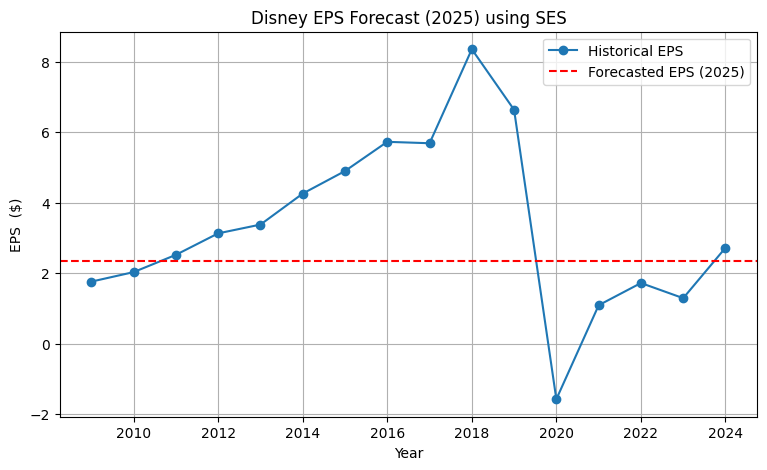

In [ ]:
print(f"Forecasted EPS for 2025 using SES: ${forecasted_eps_2025:.2f}")
# Plot the historical EPS and the forecast
plt.figure(figsize=(9, 5))
plt.plot(eps_df, label="Historical EPS", marker="o")
plt.axhline(y=forecasted_eps_2025, color="r", linestyle="--", label="Forecasted EPS (2025)")
plt.title("Disney EPS Forecast (2025) using SES")
plt.xlabel("Year")
plt.ylabel("EPS  ($)")
plt.legend()
plt.grid()
plt.show()

**Forecasted EPS for 2025 using Holt's Linear Trend**

In [ ]:
# Ensure the data is sorted and set up for time series
eps_df1 = eps_df.sort_index()
eps_df1.index = eps_df1.index.to_period('Y').to_timestamp()
eps_df1 = eps_df1.loc['2020':]

In [ ]:
# Fit Holt's Linear Trend Model on the entire dataset starting from 2020
holt_model = ExponentialSmoothing(eps_df1["EPS"], trend="add", seasonal=None).fit()

In [ ]:
# Forecast EPS for 2025
forecast = holt_model.forecast(steps=1)
forecasted_eps_2025 = forecast.iloc[0]
print(f"Forecasted EPS for 2025 using Holt's Linear Trend: ${forecasted_eps_2025:.2f}")

Forecasted EPS for 2025 using Holt's Linear Trend: $3.69


Forecasted EPS for 2025 using Holt's Linear Trend: $3.69


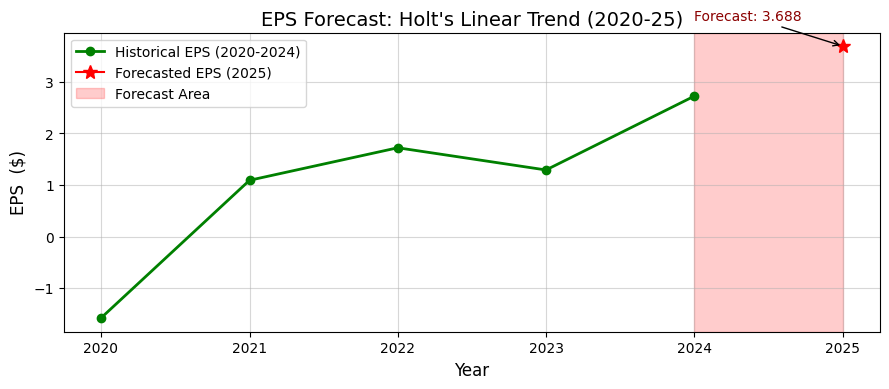

In [ ]:
# Filter the data for years 2020 to 2024
filtered_eps_df = eps_df["2020-01-01":"2024-12-31"]

# Assuming 'forecasted_eps_2025' is the forecasted value for 2025
forecasted_years = ["2025"]
forecasted_values = [forecasted_eps_2025]

# Plot the filtered historical data
plt.figure(figsize=(9, 4))
plt.plot(filtered_eps_df.index, filtered_eps_df["EPS"], label="Historical EPS (2020-2024)", marker="o", color="Green", linewidth=2)

# Extend the forecasted values into the plot
forecast_index = [np.datetime64("2025")]
plt.plot(forecast_index, forecasted_values, label="Forecasted EPS (2025)", marker="*", color="red", markersize=10)

# Highlight the forecasted area
plt.axvspan(filtered_eps_df.index[-1], forecast_index[0], color="red", alpha=0.2, label="Forecast Area")

# Title and labels
plt.title("EPS Forecast: Holt's Linear Trend (2020-25)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("EPS  ($)", fontsize=12)

# Grid and legend
plt.grid(alpha=0.5)
plt.legend(fontsize=10, loc="upper left")

# Adding a note or annotation
plt.annotate(f"Forecast: {forecasted_eps_2025:.3f}",
             xy=(forecast_index[0], forecasted_eps_2025),
             xytext=(forecast_index[0] - np.timedelta64(1, 'Y'), forecasted_eps_2025 + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=10, color="darkred")
print(f"Forecasted EPS for 2025 using Holt's Linear Trend: ${forecasted_eps_2025:.2f}")
# Show the plot
plt.tight_layout()
plt.show()

**In this analysis, we opted for Holt's Linear Trend Forecast over the Simple Exponential Smoothing (SES) method for the following reasons:**


**Nature of the Data:**

*Holt's Linear Trend is specifically designed for time series data that exhibits a clear trend over time. The earnings per share (EPS) data from 2020 to 2024 shows an upward trend, making Holt's model better suited for capturing and extending this pattern.*

*On the other hand, SES assumes no underlying trend in the data and is best for stationary time series. While SES provides a basic forecast, it fails to capture the upward trajectory observed in our data, leading to a less dynamic and less accurate prediction.*

**Handling of Drastic Changes (COVID-19 Impact):**

*The significant drop in EPS during 2020 is attributed to the global economic impact of the COVID-19 pandemic. This event caused substantial disruptions across industries, including Disney. The recovery trend observed in the years following 2020 (2021-2024) reflects the company's resilience and strategic recovery efforts.*

*By focusing on the 2020-2024 period for Holt's Linear Trend, the forecast leverages the most relevant and recent recovery trajectory, avoiding distortion from earlier pre-COVID years, where the EPS followed a different growth pattern.*

**Improved Forecasting Accuracy:**

Holt's Linear Trend incorporates both level and trend components, allowing the model to account for the overall direction and rate of change in the EPS. This makes the forecast more accurate and reflective of the post-pandemic growth dynamics.

*SES, on the other hand, does not capture this recovery trend, leading to an undervalued prediction of 2.36 usd for 2025 compared to Holt's Linear Trend forecast of  3.69 usd.*

**Selection of 2020 to 2024:**

*The decision to focus on the 2020-2024 period ensures that the forecast aligns with recent trends and avoids skewing results with pre-pandemic data, which may not accurately represent the current business environment.
Data from earlier years (pre-2020) reflects a different market and operational context, where the drastic fall in EPS due to COVID-19 had not yet occurred. Using this period would dilute the accuracy and relevance of the forecast.*

**Interpretability and Relevance:**

*Holt's Linear Trend forecast predicts an EPS for 2025 of $3.69, which aligns with the observed post-pandemic growth trajectory. This is a more realistic projection compared to SES, which underestimates the EPS due to its inability to account for trends.*

*In conclusion, Holt's Linear Trend is chosen for its ability to effectively capture the upward trajectory of EPS following the COVID-19 pandemic while focusing on the 2020-2024 recovery period. This ensures a realistic and actionable forecast for 2025, accounting for recent trends and external economic impacts.*